In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
housePrices = pd.read_csv('HousePrices.csv')

In [3]:
housePrices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  546 non-null    int64  
 1   price       546 non-null    float64
 2   lotsize     546 non-null    int64  
 3   bedrooms    546 non-null    int64  
 4   bathrooms   546 non-null    int64  
 5   stories     546 non-null    int64  
 6   driveway    546 non-null    object 
 7   recreation  546 non-null    object 
 8   fullbase    546 non-null    object 
 9   gasheat     546 non-null    object 
 10  aircon      546 non-null    object 
 11  garage      546 non-null    int64  
 12  prefer      546 non-null    object 
dtypes: float64(1), int64(6), object(6)
memory usage: 55.6+ KB


In [4]:
housePrices.head()

,Unnamed: 0,price,lotsize,bedrooms,bathrooms,stories,driveway,recreation,fullbase,gasheat,aircon,garage,prefer
0,1,42000.0,5850,3,1,2,yes,no,yes,no,no,1,no
1,2,38500.0,4000,2,1,1,yes,no,no,no,no,0,no
2,3,49500.0,3060,3,1,1,yes,no,no,no,no,0,no
3,4,60500.0,6650,3,1,2,yes,yes,no,no,no,0,no
4,5,61000.0,6360,2,1,1,yes,no,no,no,no,0,no


In [5]:
housePrices.shape

(546, 13)

In [6]:
#the first column(feature) Unnamed: 0 is acting as a 2nd index which is redundant
housePrices.drop(columns = 'Unnamed: 0', inplace= True)
housePrices.head(1)

,price,lotsize,bedrooms,bathrooms,stories,driveway,recreation,fullbase,gasheat,aircon,garage,prefer
0,42000.0,5850,3,1,2,yes,no,yes,no,no,1,no


In [7]:
housePrices.shape

(546, 12)

In [8]:
housePrices.describe().round(1)

,price,lotsize,bedrooms,bathrooms,stories,garage
count,546.0,546.0,546.0,546.0,546.0,546.0
mean,68121.6,5150.3,3.0,1.3,1.8,0.7
std,26702.7,2168.2,0.7,0.5,0.9,0.9
min,25000.0,1650.0,1.0,1.0,1.0,0.0
25%,49125.0,3600.0,2.0,1.0,1.0,0.0
50%,62000.0,4600.0,3.0,1.0,2.0,0.0
75%,82000.0,6360.0,3.0,2.0,2.0,1.0
max,190000.0,16200.0,6.0,4.0,4.0,3.0


In [9]:
housePrices.columns

Index(['price', 'lotsize', 'bedrooms', 'bathrooms', 'stories', 'driveway',
       'recreation', 'fullbase', 'gasheat', 'aircon', 'garage', 'prefer'],
      dtype='object')

In [10]:
(housePrices[housePrices.columns[5:12]]=='yes').sum()

driveway      469
recreation     97
fullbase      191
gasheat        25
aircon        173
garage          0
prefer        128
dtype: int64

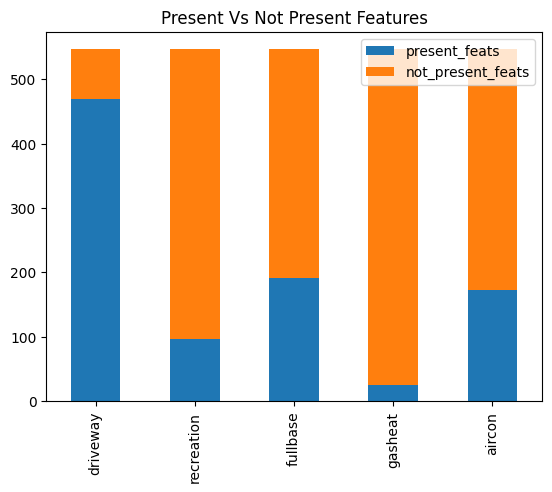

In [11]:
present_feature = (housePrices[housePrices.columns[5:10]]=='yes').sum()
not_present_feature = (housePrices[housePrices.columns[5:10]]=='no').sum()


df = pd.DataFrame({'present_feats': present_feature,'not_present_feats': not_present_feature})
ax = df.plot(kind='bar',title='Present Vs Not Present Features', stacked=True)

In [12]:
#housePrices.columns[5:10] = housePrices.columns[5:10].to_series().replace(to_replace = ['yes','no'],value = ['1','0'])

In [13]:
housePrices.driveway = housePrices.driveway.replace(to_replace = ['yes','no'],value = ['1','0']).astype(int)
housePrices.fullbase = housePrices.fullbase.replace(to_replace = ['yes','no'],value = ['1','0']).astype(int)
housePrices.gasheat = housePrices.gasheat.replace(to_replace = ['yes','no'],value = ['1','0']).astype(int)
housePrices.aircon = housePrices.aircon.replace(to_replace = ['yes','no'],value = ['1','0']).astype(int)
housePrices.prefer = housePrices.prefer.replace(to_replace = ['yes','no'],value = ['1','0']).astype(int)
housePrices.recreation = housePrices.recreation.replace(to_replace = ['yes','no'],value = ['1','0']).astype(int)

In [14]:
housePrices.head()

,price,lotsize,bedrooms,bathrooms,stories,driveway,recreation,fullbase,gasheat,aircon,garage,prefer
0,42000.0,5850,3,1,2,1,0,1,0,0,1,0
1,38500.0,4000,2,1,1,1,0,0,0,0,0,0
2,49500.0,3060,3,1,1,1,0,0,0,0,0,0
3,60500.0,6650,3,1,2,1,1,0,0,0,0,0
4,61000.0,6360,2,1,1,1,0,0,0,0,0,0


<Axes: >

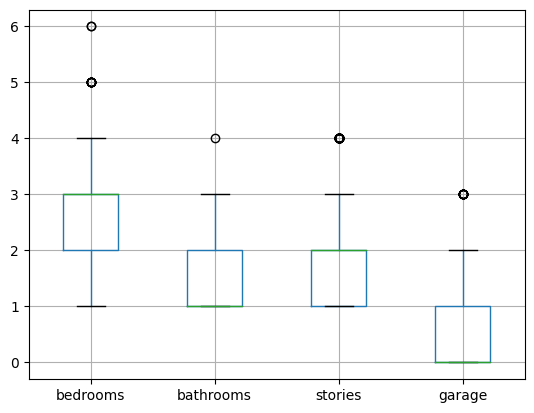

In [15]:
bbsg_boxplot = housePrices.boxplot(column=['bedrooms','bathrooms','stories','garage'])
bbsg_boxplot

In [93]:
mask_bedrooms = housePrices.bedrooms <= 4
mask_bathrooms = housePrices.bathrooms <= 3
mask_stories = housePrices.stories <= 3
mask_garages = housePrices.garage <= 2
housePrices1 = housePrices[mask_bedrooms & mask_bedrooms & mask_stories & mask_garages]
housePrices1

,price,lotsize,bedrooms,bathrooms,stories,driveway,recreation,fullbase,gasheat,aircon,garage,prefer
0,42000.0,5850,3,1,2,1,0,1,0,0,1,0
1,38500.0,4000,2,1,1,1,0,0,0,0,0,0
2,49500.0,3060,3,1,1,1,0,0,0,0,0,0
3,60500.0,6650,3,1,2,1,1,0,0,0,0,0
4,61000.0,6360,2,1,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
537,83000.0,4800,3,1,3,1,0,0,0,1,0,0
538,84000.0,6500,3,2,3,1,0,0,0,1,0,0
539,85000.0,7320,4,2,2,1,0,0,0,0,0,0
544,105000.0,6000,3,2,2,1,1,0,0,1,1,0


Text(0, 0.5, 'Count')

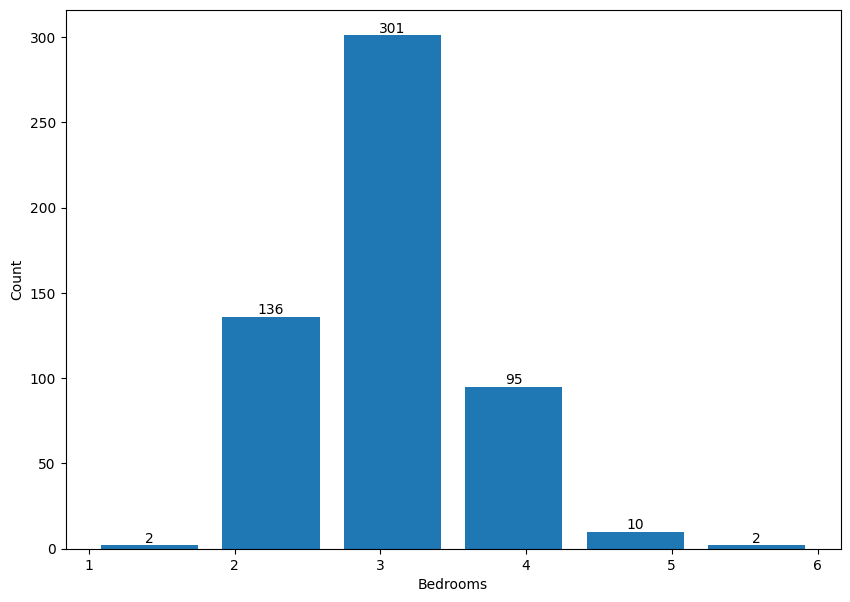

In [94]:
plt.rcParams['figure.figsize']=(10,7)
counts, edges, bars = plt.hist(housePrices.bedrooms, bins =6, rwidth =0.8)
plt.bar_label(bars)
plt.xlabel('Bedrooms')
plt.ylabel('Count')


Text(0, 0.5, 'Count')

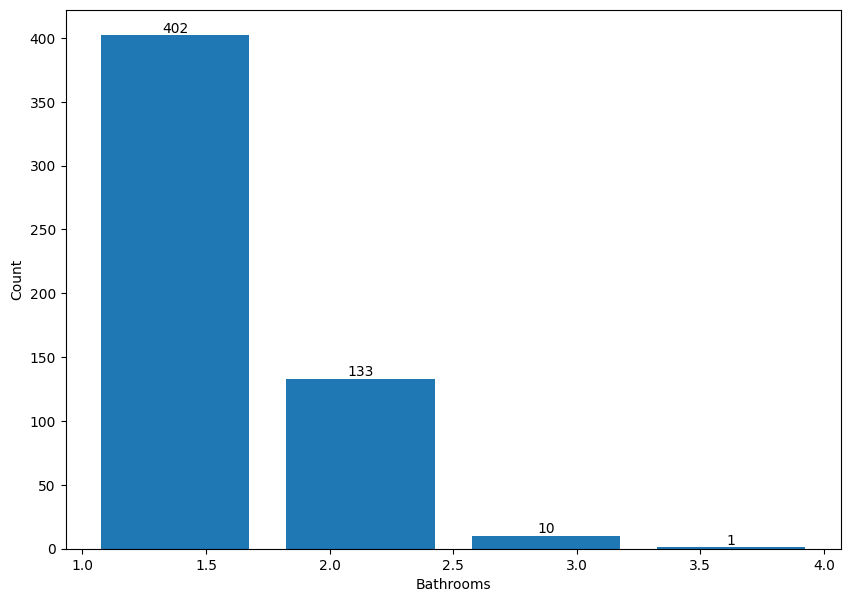

In [95]:
plt.rcParams['figure.figsize']=(10,7)
counts, edges, bars = plt.hist(housePrices.bathrooms, bins=4, rwidth=0.8)
plt.bar_label(bars)
plt.xlabel('Bathrooms')
plt.ylabel('Count')


Text(0, 0.5, 'Count')

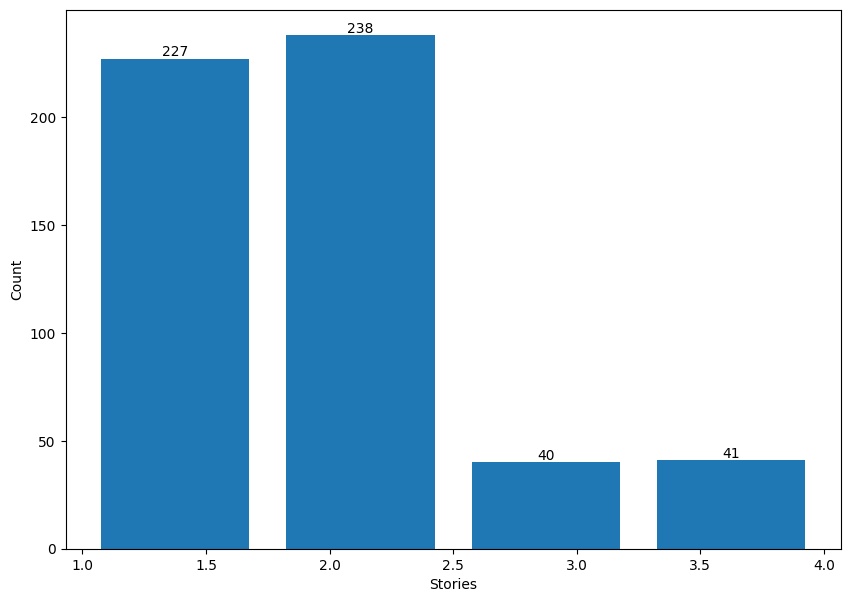

In [96]:
plt.rcParams['figure.figsize']=(10,7)
counts, edges, bars = plt.hist(housePrices.stories, bins =4, rwidth =0.8)
plt.bar_label(bars)
plt.xlabel('Stories')
plt.ylabel('Count')


In [97]:
housePrices1.corr()

,price,lotsize,bedrooms,bathrooms,stories,driveway,recreation,fullbase,gasheat,aircon,garage,prefer
price,1.000000,0.509844,0.363128,0.431473,0.244323,0.287276,0.285695,0.281349,0.118005,0.395913,0.385728,0.378871
lotsize,0.509844,1.000000,0.114312,0.095423,-0.072569,0.267661,0.157092,0.086458,-0.004111,0.204353,0.322349,0.261154
bedrooms,0.363128,0.114312,1.000000,0.348868,0.468924,-0.000432,0.085105,0.136205,0.027129,0.164520,0.134488,0.141542
bathrooms,0.431473,0.095423,0.348868,1.000000,0.194289,0.011332,0.154212,0.177239,0.078542,0.121770,0.146630,0.086820
stories,0.244323,-0.072569,0.468924,0.194289,1.000000,0.070710,-0.008376,-0.084740,0.071074,0.140366,-0.048967,0.072212
driveway,0.287276,0.267661,-0.000432,0.011332,0.070710,1.000000,0.084524,0.081978,0.012727,0.080135,0.191189,0.209569
recreation,0.285695,0.157092,0.085105,0.154212,-0.008376,0.084524,1.000000,0.414630,0.001437,0.110506,0.072987,0.168306
fullbase,0.281349,0.086458,0.136205,0.177239,-0.084740,0.081978,0.414630,1.000000,-0.029378,0.093070,0.084710,0.234262
gasheat,0.118005,-0.004111,0.027129,0.078542,0.071074,0.012727,0.001437,-0.029378,1.000000,-0.116503,0.094883,-0.057157
aircon,0.395913,0.204353,0.164520,0.121770,0.140366,0.080135,0.110506,0.093070,-0.116503,1.000000,0.139485,0.128552


<Axes: >

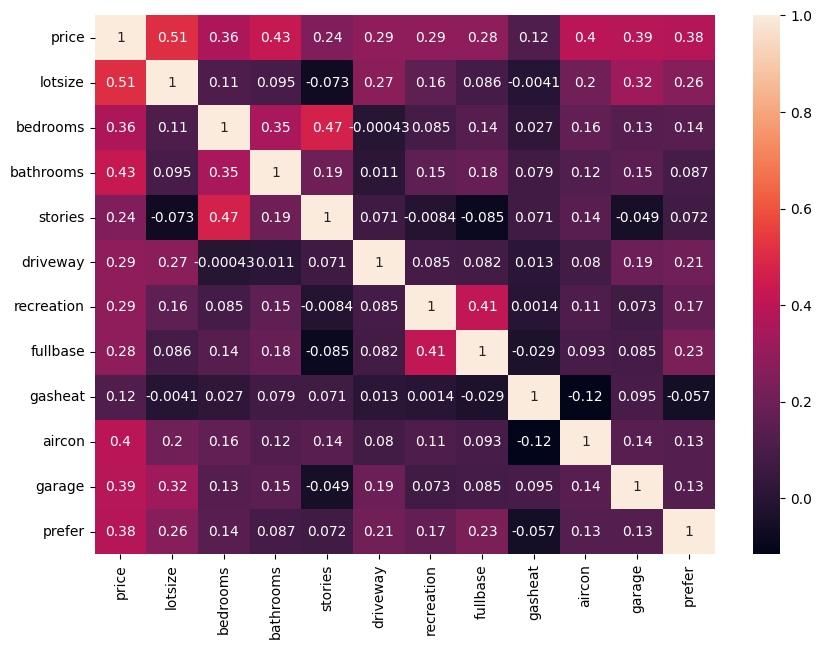

In [99]:
sns.heatmap(housePrices1.corr(), annot=True)

In [100]:
#convert lotsize to square meters, assumption lot size =  8600 sq ft
#Create a new feature
housePrices1['price_per_lotsize']=housePrices1.price/housePrices1.lotsize
housePrices1.head()

/tmp/ipykernel_21149/2333830430.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housePrices1['price_per_lotsize']=housePrices1.price/housePrices1.lotsize


,price,lotsize,bedrooms,bathrooms,stories,driveway,recreation,fullbase,gasheat,aircon,garage,prefer,price_per_lotsize
0,42000.0,5850,3,1,2,1,0,1,0,0,1,0,7.179487
1,38500.0,4000,2,1,1,1,0,0,0,0,0,0,9.625000
2,49500.0,3060,3,1,1,1,0,0,0,0,0,0,16.176471
3,60500.0,6650,3,1,2,1,1,0,0,0,0,0,9.097744
4,61000.0,6360,2,1,1,1,0,0,0,0,0,0,9.591195


<Axes: >

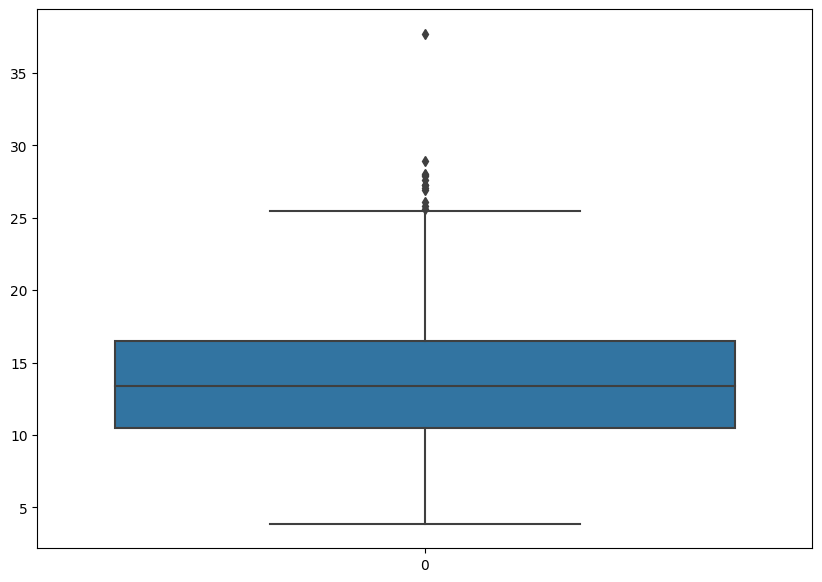

In [101]:
sns.boxplot(data=housePrices1['price_per_lotsize'])

In [102]:
housePrices2 = housePrices1[housePrices1.price_per_lotsize<=26]
housePrices2.head()

,price,lotsize,bedrooms,bathrooms,stories,driveway,recreation,fullbase,gasheat,aircon,garage,prefer,price_per_lotsize
0,42000.0,5850,3,1,2,1,0,1,0,0,1,0,7.179487
1,38500.0,4000,2,1,1,1,0,0,0,0,0,0,9.625000
2,49500.0,3060,3,1,1,1,0,0,0,0,0,0,16.176471
3,60500.0,6650,3,1,2,1,1,0,0,0,0,0,9.097744
4,61000.0,6360,2,1,1,1,0,0,0,0,0,0,9.591195


In [103]:
housePrices2.shape

(473, 13)

<Axes: xlabel='lotsize', ylabel='price'>

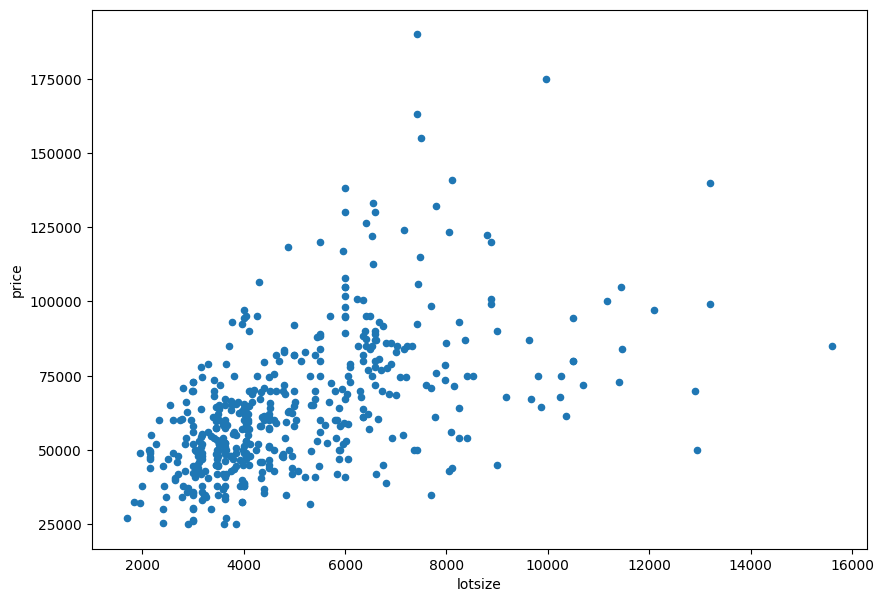

In [113]:
housePrices2.plot(kind='scatter', x = 'lotsize', y ='price')

prefer
0    Axes(0.125,0.11;0.775x0.77)
1    Axes(0.125,0.11;0.775x0.77)
dtype: object

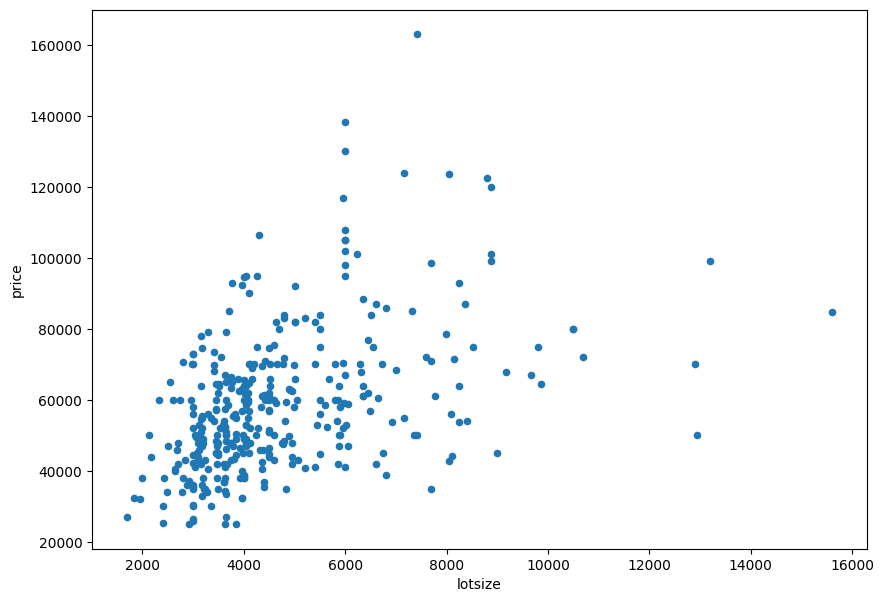

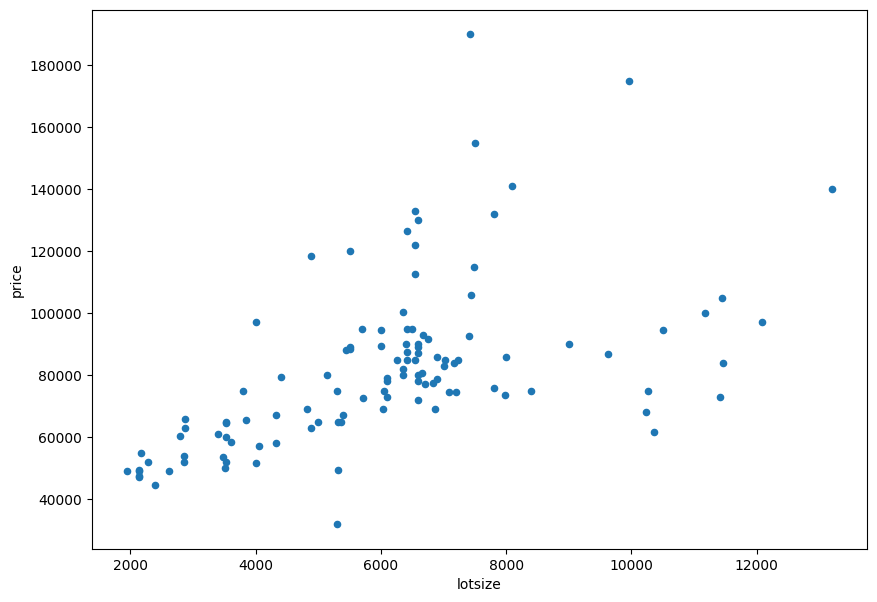

In [105]:
housePrices2.groupby('prefer').plot(kind='scatter', x = 'lotsize', y ='price')

<Axes: xlabel='stories'>

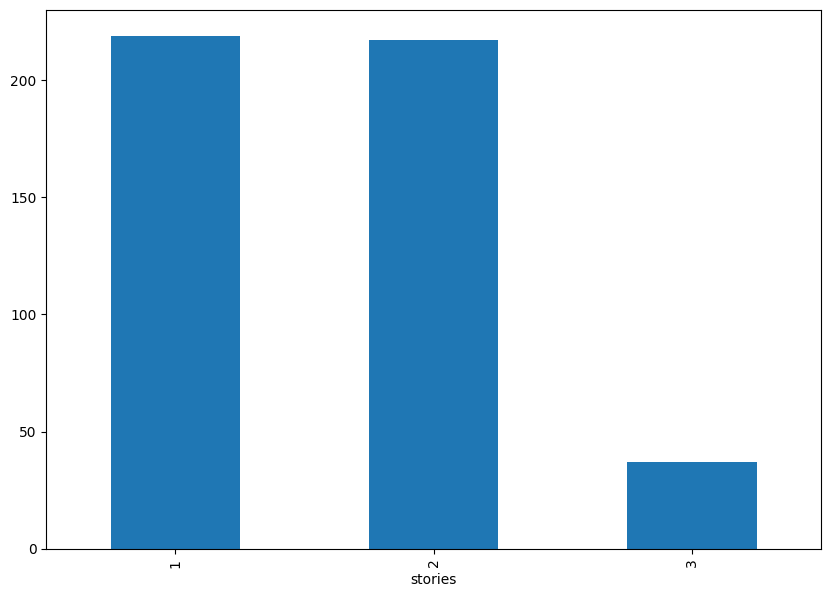

In [106]:
housePrices2.groupby(['stories'])['bedrooms'].count().plot.bar()

In [110]:
housePrices2.groupby(['prefer','bedrooms'])['price'].mean()

prefer  bedrooms
0       1            38750.000000
        2            49944.537815
        3            62254.864130
        4            66723.636364
1       2            63313.333333
        3            80026.645570
        4           104081.578947
Name: price, dtype: float64

In [111]:
housePrices2.groupby(['prefer','stories'])['price'].mean()

prefer  stories
0       1          54076.458333
        2          61215.697674
        3          76582.500000
1       1          77231.470588
        2          84885.555556
        3          87688.235294
Name: price, dtype: float64

stories
1    Axes(0.125,0.11;0.775x0.77)
2    Axes(0.125,0.11;0.775x0.77)
3    Axes(0.125,0.11;0.775x0.77)
dtype: object

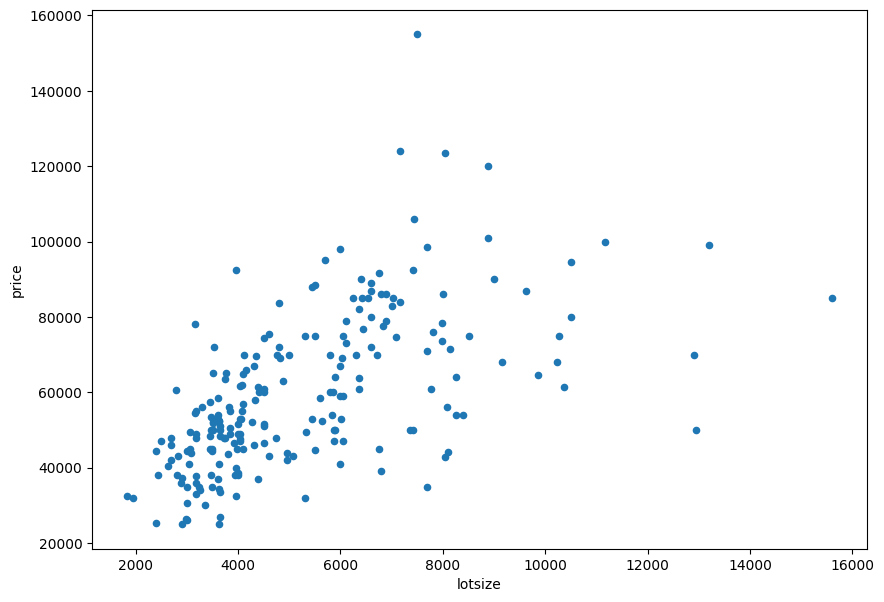

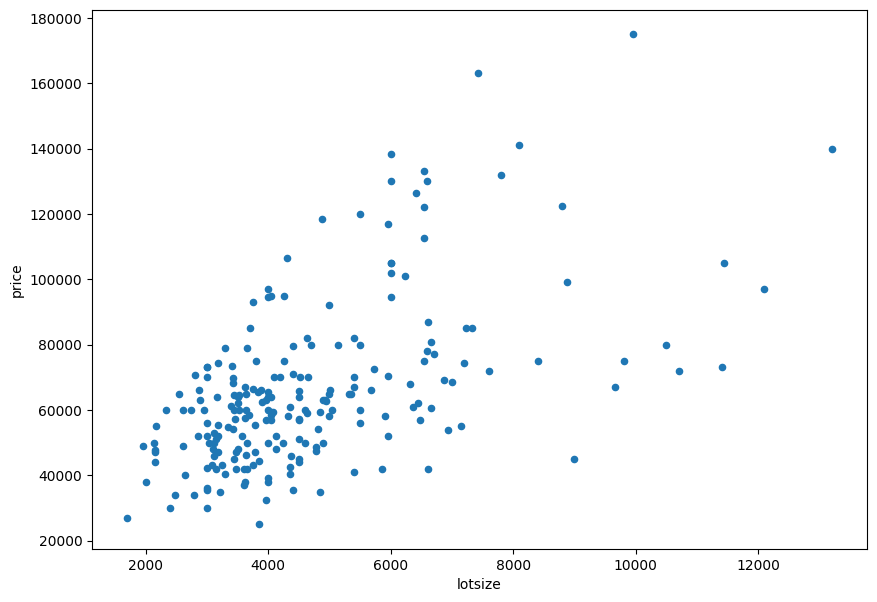

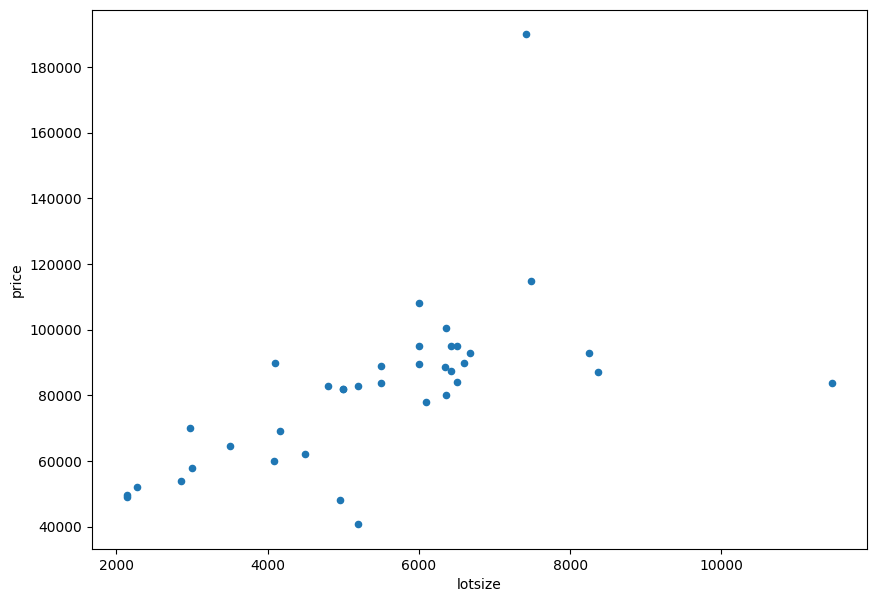

In [107]:
housePrices2.groupby('stories').plot(kind='scatter', x = 'lotsize', y ='price')

In [114]:
housePrices2.groupby(['aircon','bedrooms'])['price'].mean()

aircon  bedrooms
0       1           38750.000000
        2           49728.318584
        3           61685.635359
        4           66882.608696
1       2           60657.142857
        3           80632.926829
        4           91812.500000
Name: price, dtype: float64

In [115]:
housePrices2.groupby(['garage','bedrooms'])['price'].mean()

garage  bedrooms
0       1           38750.000000
        2           48994.117647
        3           60915.894040
        4           61840.540541
1       2           53923.529412
        3           74747.272727
        4           86502.941176
2       2           59680.000000
        3           78378.947368
        4           94435.000000
Name: price, dtype: float64

bedrooms
1    Axes(0.125,0.11;0.775x0.77)
2    Axes(0.125,0.11;0.775x0.77)
3    Axes(0.125,0.11;0.775x0.77)
4    Axes(0.125,0.11;0.775x0.77)
dtype: object

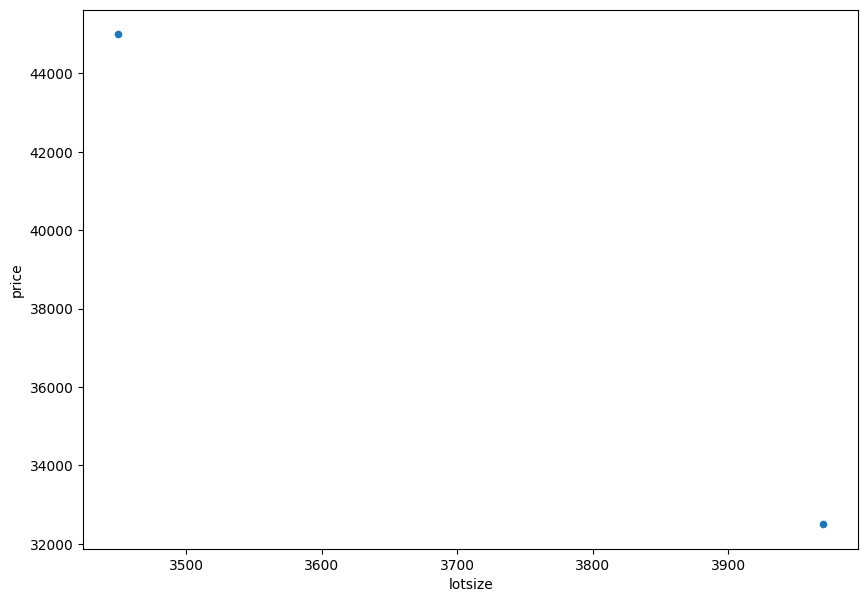

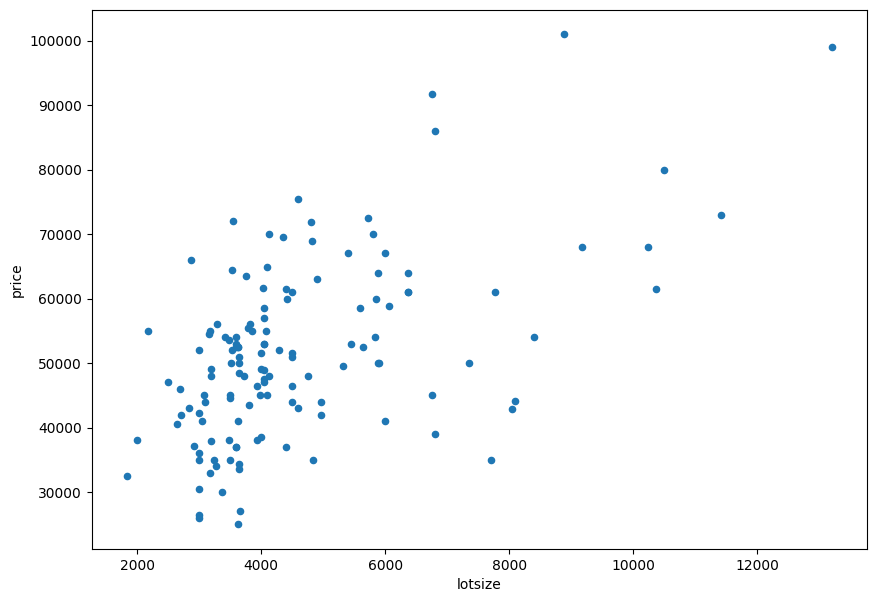

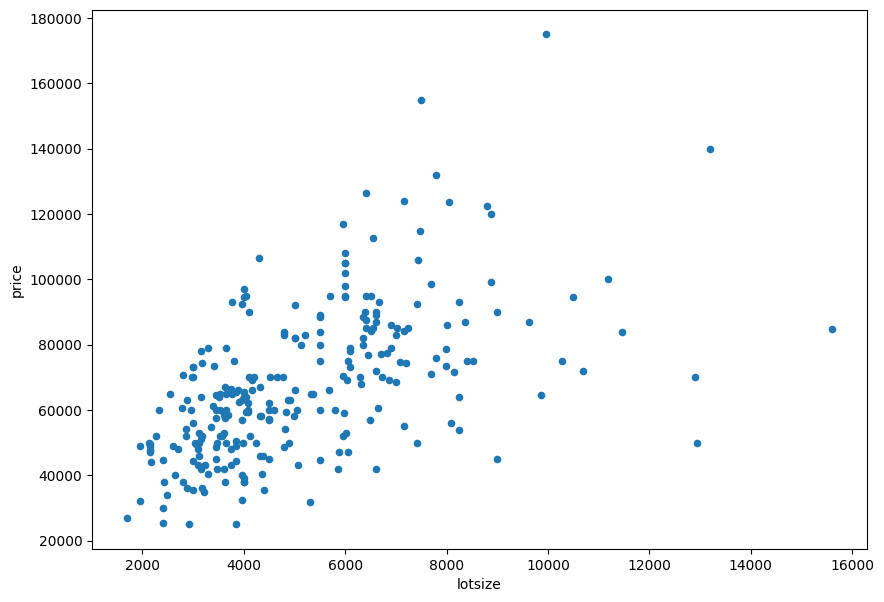

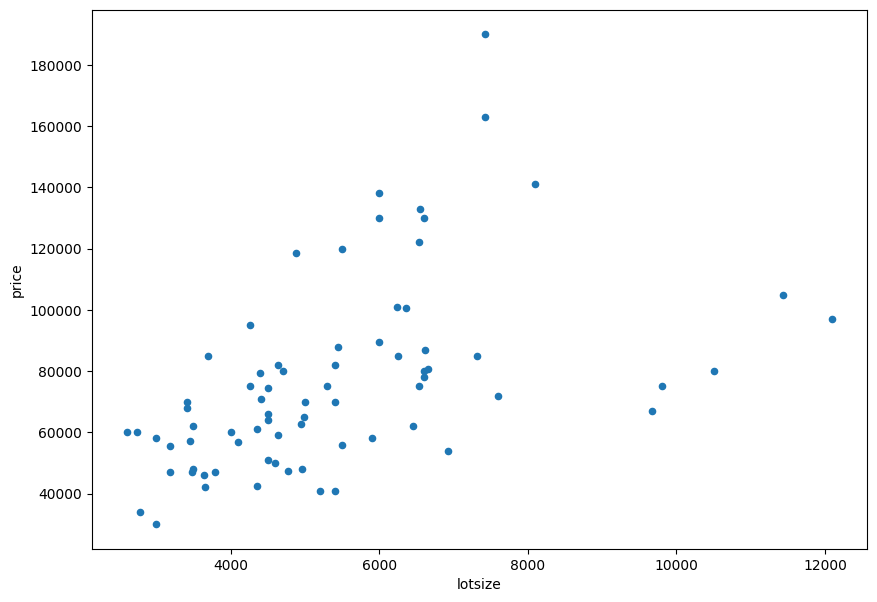

In [108]:
housePrices2.groupby('bedrooms').plot(kind='scatter', x = 'lotsize', y ='price')